## Linear Regression




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Linear Regression using Ordinary Least Squares

* Feature consist of p independent variables (p-dim)
* Target/dependent variable is represented by y
* Relation between feature & target is represented by the following equation
* w's represent weights or coef's for each feature, w0 is intercept 

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

In [0]:
from sklearn.linear_model import LinearRegression

* Residual Squared Sum (RSS) of Error - Sum of square of difference between actual value & predicted value

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

## 2. Gradient Descent

* LinearRegression tries to minimize RSS using <a href="https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html">Gradient Descent</a>. 
* The objective of Gradient Descent is the obtain best weights such that RSS is minimal.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/gd.PNG?raw=true" width="500">

# Feature Transformation
![](img/1.featureTransform-01.jpg)

### Understanding Math behind gradient descent with simplified notation
* Prediction, $y_p = Ax+B$
* Actual, y
* Simplified Loss for caclulation, Loss = $1/2 *\sum(y_p - y)^2$
* Algorithm 
  - Randomly initialize weights A & B
  - Calculate gradient .i.e change in Loss when A & B are changed.
  - Change weights by gradients calculated & reduce the loss
  - Repeat the whole process till weights don't significantly reduce any further
  
![](img/2.gradientDescent-01.jpg)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Genrating Regression Dataset
* n_features - number of features to be considered
* noise - deviation from straight line
* n_samples - number of samples

In [0]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

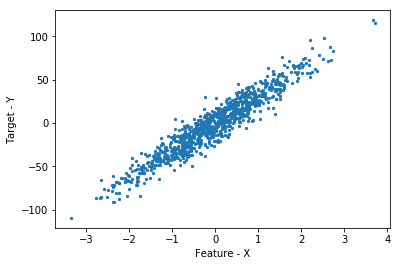

In [0]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

* Hyper-parameters are initial configuration of Models
* Initialize LinearRegression model with default hyper-parameters

In [0]:
lr = LinearRegression()

#### Common Hyperparameters
* fit_interceprt - Whether to calculate intercept for the model, not required if data is centered
* normalize - X will be normalized by subtracting mean & dividing by standard deviation

* <b>PS: By stanrdadizing data before subjecting to model, coef's tells the importance of features</b>

#### Common Attributes
* coef - weights for each independent variables
* intercept - bias of independent term of linear models

#### Common Functions
* fit - trains the model. Takes X & Y
* predict - Once model is trained, for given X using predict function Y can be predicted

#### Multiple Target
* Y can be of more than 1 dimension
* Advantages of multiple target are 
  - computationally fast
  - model is optimized for multiple targets
  - model do not use relationship between targets
  - model is more interpretable
  
<hr/>

### Training model
* X should be in rows of data format, X.ndim == 2
* Y should be 1D for simgle target & 2D for more than one target
* fit function for training the model

In [0]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
lr.coef_

array([31.36482038])

In [0]:
lr.intercept_

-0.16344907235574668

### Predicting using trained model

In [0]:
pred = lr.predict(X)

* Blue dots represent maps to actual target data
* Orange dots represent predicted data 

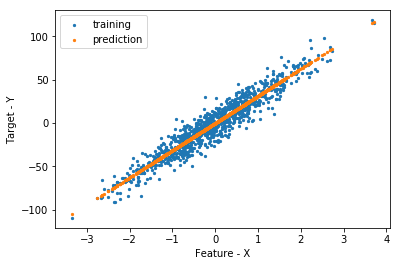

In [0]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

#### Limitation of Ordinary Least Square Technique
* Impacted by Outliers
* Non-linearities 
* Too many independent variables
* Multicollinearity 
* Heteroskedasticity
* Noise in the Independent Variables
* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

### Bias Variance 
<img src="https://github.com/awantik/machine-learning-slides/blob/master/bv.PNG?raw=true">
#### Bias

* Fitting training data poorly, but produce similar result outside training data
* we are building simple models that predicts terribly far from the reality but they don't change much from dataset to dataset.
* Situation of underfitting.
*  a linear regression model would have high bias when trying to model a non-linear relationship.

#### Variance
* Building complex model that fits the training data well but many not work similar way of other dataset.
* Model is not generalized & is overfitting.

#### Bias Variance TradeOff
* Increasing the accuracy of the model will lead to less generalization of pattern outside training data. 
* Increasing the bias will decrease the variance. 
* Increasing the variance will decrease the bias.
* We have to get perfect balance of bias & variance

![](img/questions-01.png)

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


df = pd.read_csv("https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2015%20Fuel%20Consumption%20Ratings%20(5-cycle).csv", encoding='latin1',header=[0,1])
df=df.reset_index()
# take a look at the dataset
df.head()


,index,MODEL,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,CO2 EMISSIONS,Unnamed: 13_level_0,Unnamed: 14_level_0
,,YEAR,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,(L),Unnamed: 5_level_1,Unnamed: 6_level_1,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km),Unnamed: 13_level_1,Unnamed: 14_level_1
0,0,2015,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.7,6.7,8.3,34.0,191.0,NaN,NaN
1,1,2015,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,10.8,7.4,9.3,30.0,214.0,NaN,NaN
2,2,2015,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,6.1,6.1,46.0,140.0,NaN,NaN
3,3,2015,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0,NaN,NaN
4,4,2015,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0,NaN,NaN


In [47]:
df=df.drop(['Unnamed: 13_level_0','Unnamed: 14_level_0','index'],axis=1)
df.head(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,MODEL,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,CO2 EMISSIONS
,YEAR,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,(L),Unnamed: 5_level_1,Unnamed: 6_level_1,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
0,2015,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.7,6.7,8.3,34.0,191.0
1,2015,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,10.8,7.4,9.3,30.0,214.0
2,2015,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,6.1,6.1,46.0,140.0


In [48]:
df.columns = [' '.join(col).strip() for col in df.columns.values]

df.head(3)

,MODEL YEAR,MAKE Unnamed: 1_level_1,MODEL Unnamed: 2_level_1,VEHICLE CLASS Unnamed: 3_level_1,ENGINE SIZE (L),CYLINDERS Unnamed: 5_level_1,TRANSMISSION Unnamed: 6_level_1,FUEL TYPE,FUEL CONSUMPTION* CITY (L/100 km),Unnamed: 9_level_0 HWY (L/100 km),Unnamed: 10_level_0 COMB (L/100 km),Unnamed: 11_level_0 COMB (mpg),CO2 EMISSIONS (g/km)
0,2015,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.7,6.7,8.3,34.0,191.0
1,2015,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,10.8,7.4,9.3,30.0,214.0
2,2015,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,6.1,6.1,46.0,140.0


In [61]:
df.columns = ['YEAR', 'MAKE','MODEL', 'CLASS','ENGINESIZE','CYLINDERS','TRANSMISSION','FUEL_TYPE','FUELCONSUMPTION_COMB','HWY','COMB_L_100KM','COMB_MPG','CO2EMISSIONS']

df=df.dropna()
df.head(2)

,YEAR,MAKE,MODEL,CLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUELCONSUMPTION_COMB,HWY,COMB_L_100KM,COMB_MPG,CO2EMISSIONS
0,2015,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.7,6.7,8.3,34.0,191.0
1,2015,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,10.8,7.4,9.3,30.0,214.0


In [62]:
#Lets select some features to explore more.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4.0,9.7,191.0
1,2.4,4.0,10.8,214.0
2,1.5,4.0,6.0,140.0
3,3.5,6.0,12.7,255.0
4,3.5,6.0,12.1,244.0
5,3.5,6.0,11.9,230.0
6,3.5,6.0,8.0,177.0
7,2.4,4.0,9.6,191.0
8,3.5,6.0,11.2,212.0


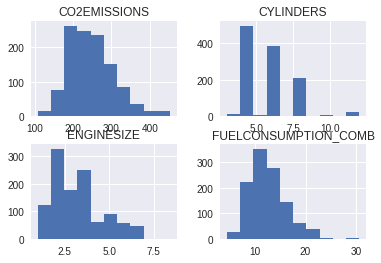

In [63]:
#we can plot each of these features:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

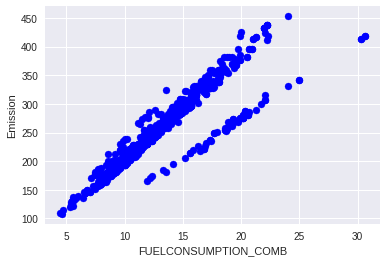

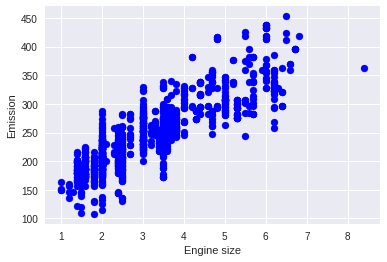

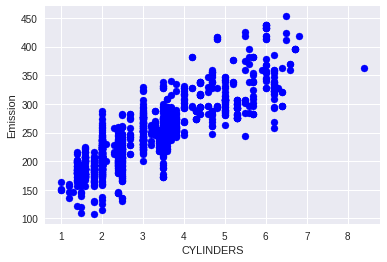

In [64]:
#Now, lets plot each of these features vs the Emission, to see how linear is their relation:

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()


Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Simple Regression Model¶
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.



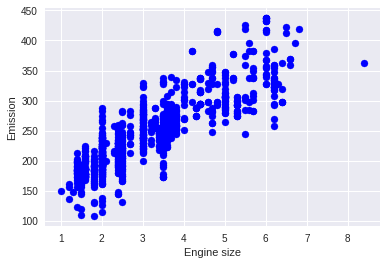

In [66]:
#Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Modeling
Using sklearn package to model data.

In [67]:
from sklearn import linear_model


regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[37.07184269]]
Intercept:  [129.24779696]


Text(0, 0.5, 'Emission')

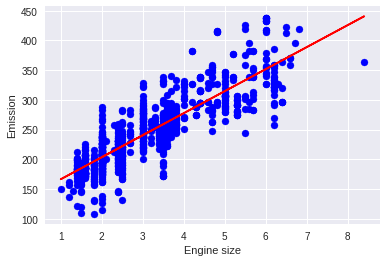

In [68]:
#Plot outputs
#we can plot the fit line over the data:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


Evaluation

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [69]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


Mean absolute error: 22.42
Residual sum of squares (MSE): 800.17
R2-score: 0.66
